In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
stock_data = pd.read_csv("C:\\Users\\sulab\\Downloads\\Group21_ProjectData.csv")
stock_price = stock_data.iloc[:,1:5]
stock_price = stock_price.values

In [54]:
mc_rep = 1000
train_days = 30
nrows = len(stock_price)
stock_returns = stock_price[1:nrows,:] / stock_price[0:nrows-1,:] - 1

In [55]:
portf_WT = np.array([1/2, -1, 0])
cov = np.cov(np.transpose(stock_returns))
miu = np.mean(stock_returns, axis=0)
Miu = np.full((train_days,3),miu)
Miu = np.transpose(Miu)

In [56]:
# initial matrix
portf_returns_30_m = np.full((train_days,mc_rep),0.)

np.random.seed(100)
for i in range(0,mc_rep):
    Z = np.random.normal(size=3*train_days)
    Z = Z.reshape((3,train_days))
    L = np.linalg.cholesky(cov)
    daily_returns = Miu + np.inner(L,np.transpose(Z))
    portf_Returns_30 = np.cumprod(np.inner(portf_WT,np.transpose(daily_returns)) + 1)
    portf_returns_30_m[:,i] = portf_Returns_30

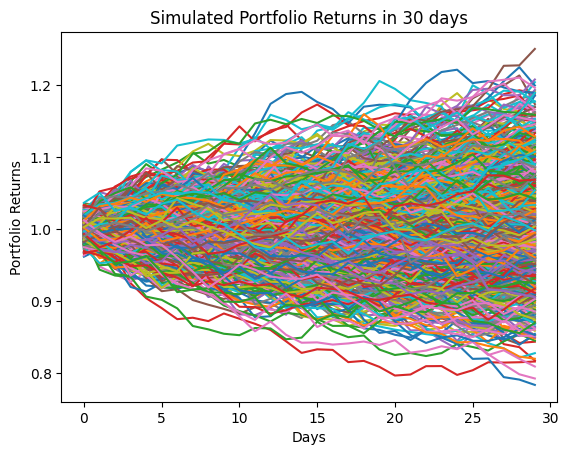

In [57]:
plt.plot(portf_returns_30_m)
plt.ylabel('Portfolio Returns')
plt.xlabel('Days')
plt.title('Simulated Portfolio Returns in 30 days')
plt.show()

In [58]:
# Porfolio Returns statistics on the 30th day
Avg_portf_returns = np.mean(portf_returns_30_m[29,:]-1)
SD_portf_returns = np.std(portf_returns_30_m[29,:]-1)
Median_portf_returns = np.median(portf_returns_30_m[29,:]-1)
print(Avg_portf_returns)
print(SD_portf_returns)
print(Median_portf_returns)

0.0017772075051460954
0.0712306297997586
-0.0037234432517365135


In [59]:
# construct CI for average
Avg_CI = np.quantile(portf_returns_30_m[29,:]-1,np.array([0.025,0.975]))
print(Avg_CI)

[-0.13182724  0.15773242]
